In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_csv('./drive/MyDrive/jobsData1.tsv', sep='\t')

In [ ]:
df.head() # Returns the first 5 rows of the DataFrame
df.info() # Returns information about the DataFrame such as data types and number of non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7606 entries, 0 to 7605
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Компани    7605 non-null   object
 1   Ажлын зар  7606 non-null   object
 2   Салбар     7606 non-null   object
 3   Түвшин     7606 non-null   object
 4   Төрөл      7606 non-null   object
 5   Цалин      7606 non-null   object
 6   Байршил    7606 non-null   object
 7   Он сар     7605 non-null   object
dtypes: object(8)
memory usage: 475.5+ KB


# Top Ажлын зар

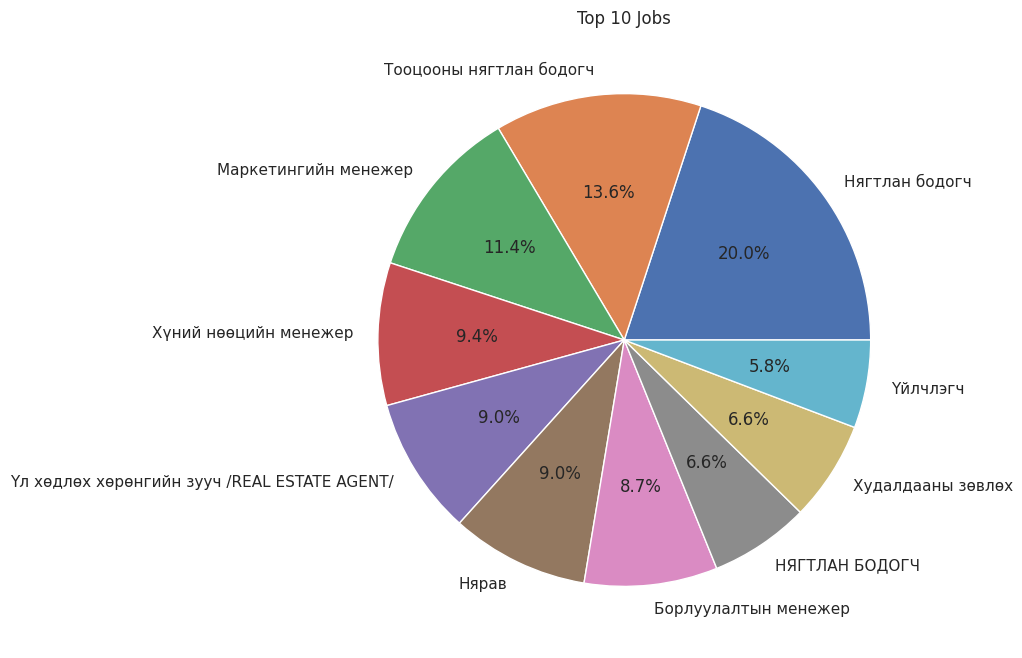

In [ ]:
top_jobs = df['Ажлын зар'].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_jobs, labels=top_jobs.index, autopct='%1.1f%%', )
plt.title('Top 10 Jobs')
plt.show()

# Top Компани

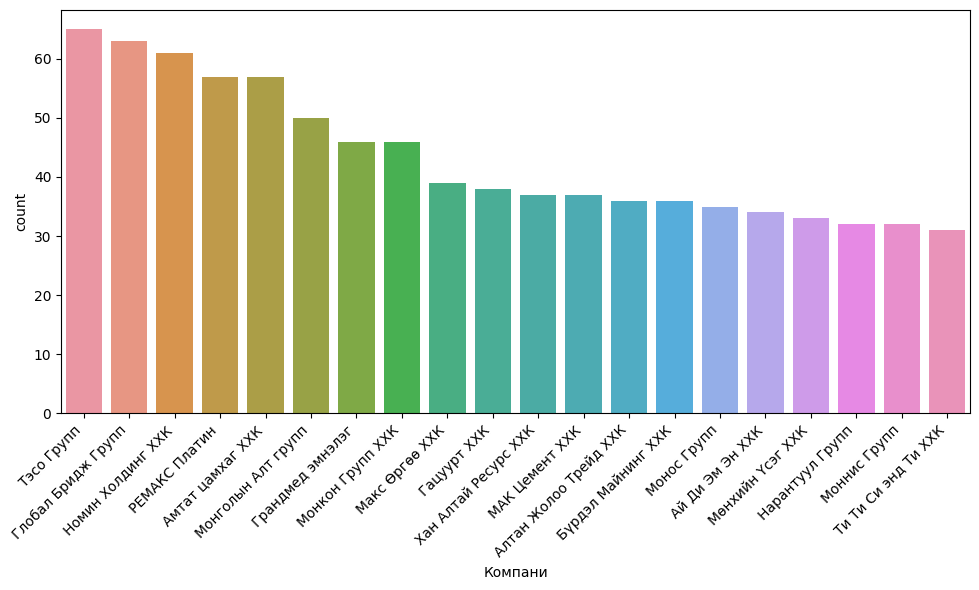

In [ ]:
top_companies = df['Компани'].value_counts().head(20).index.tolist()

# filter
df_top_companies = df[df['Компани'].isin(top_companies)]

#countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Компани', data=df_top_companies, order=df_top_companies['Компани'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Top Байршил

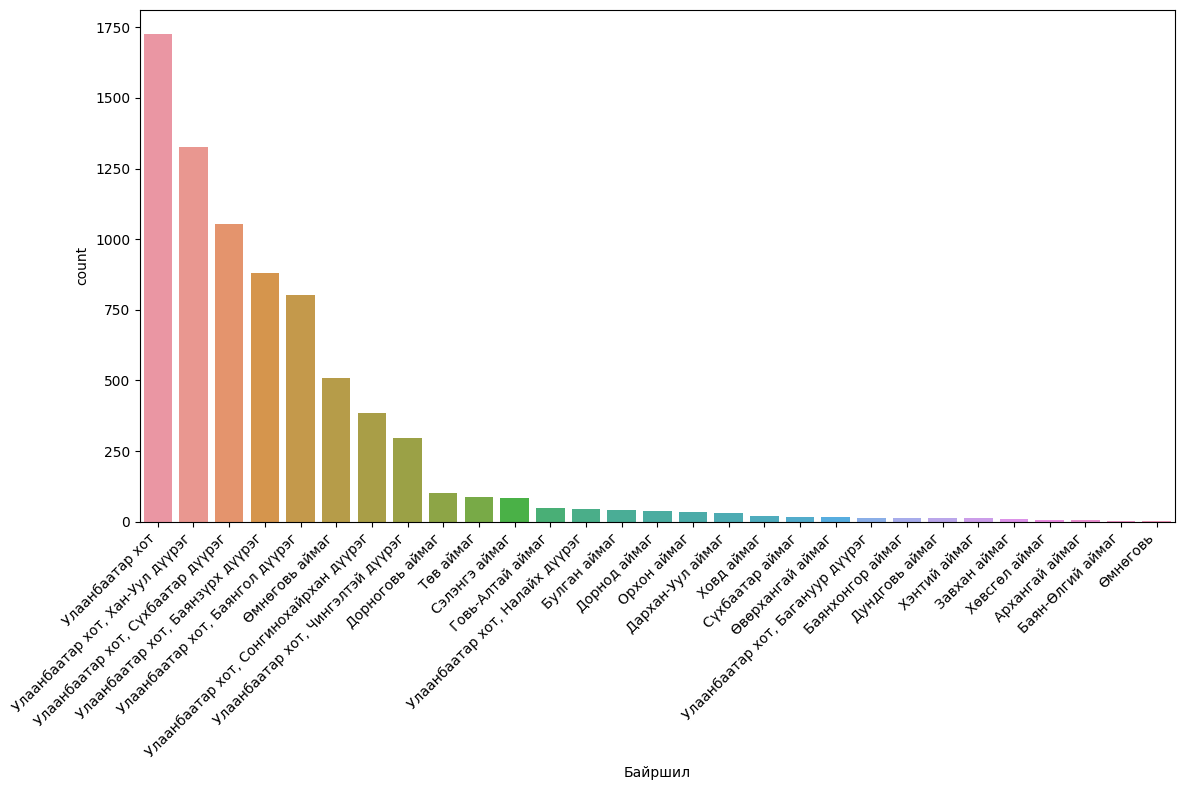

In [ ]:
# Convert 'Салбар' column to categorical data type
df['Байршил'] = df['Байршил'].astype('category')

# countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Байршил', data=df, order=df['Байршил'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Top Салбар

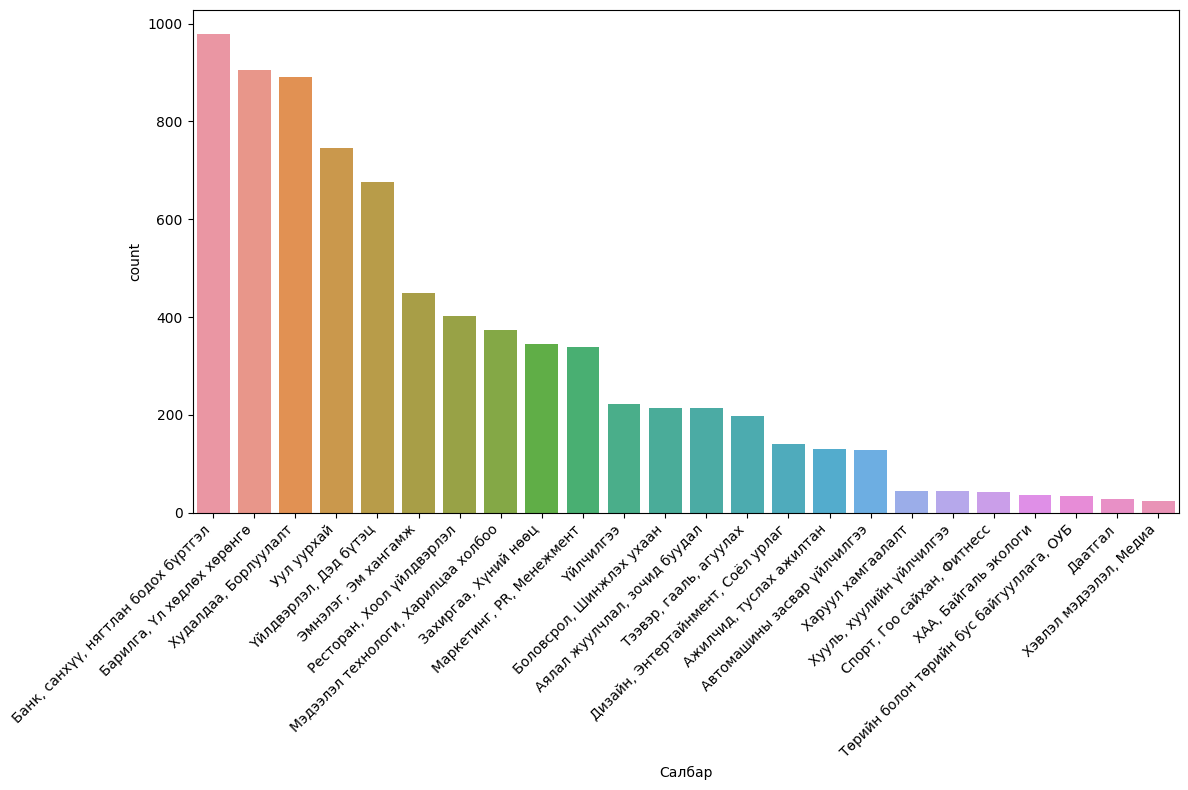

In [ ]:
# Convert 'Салбар' column to categorical data type
df['Салбар'] = df['Салбар'].astype('category')

# countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Салбар', data=df, order=df['Салбар'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Цалин ба Салбар
 


<ipython-input-28-003acdd48cac>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")


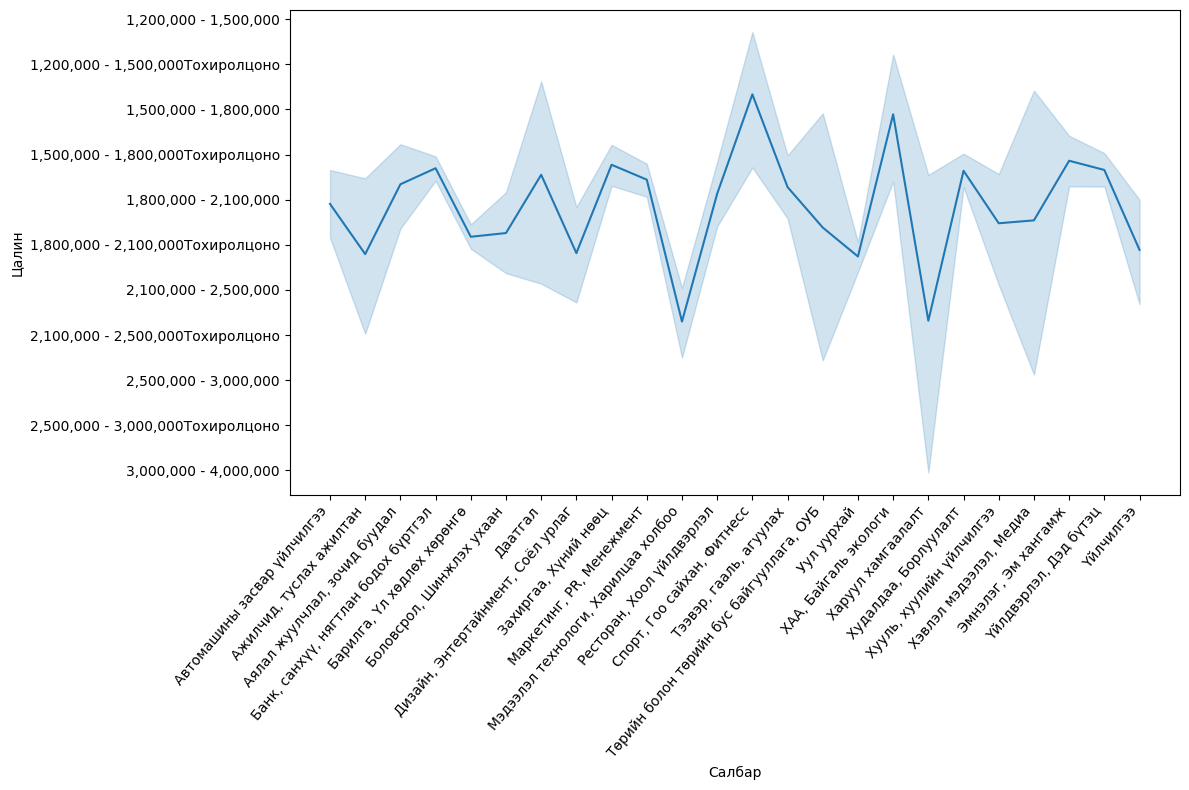

In [ ]:
df_sorted = df.sort_values(by='Цалин', ascending=True) 

plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='Салбар', y='Цалин',  data=df_sorted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

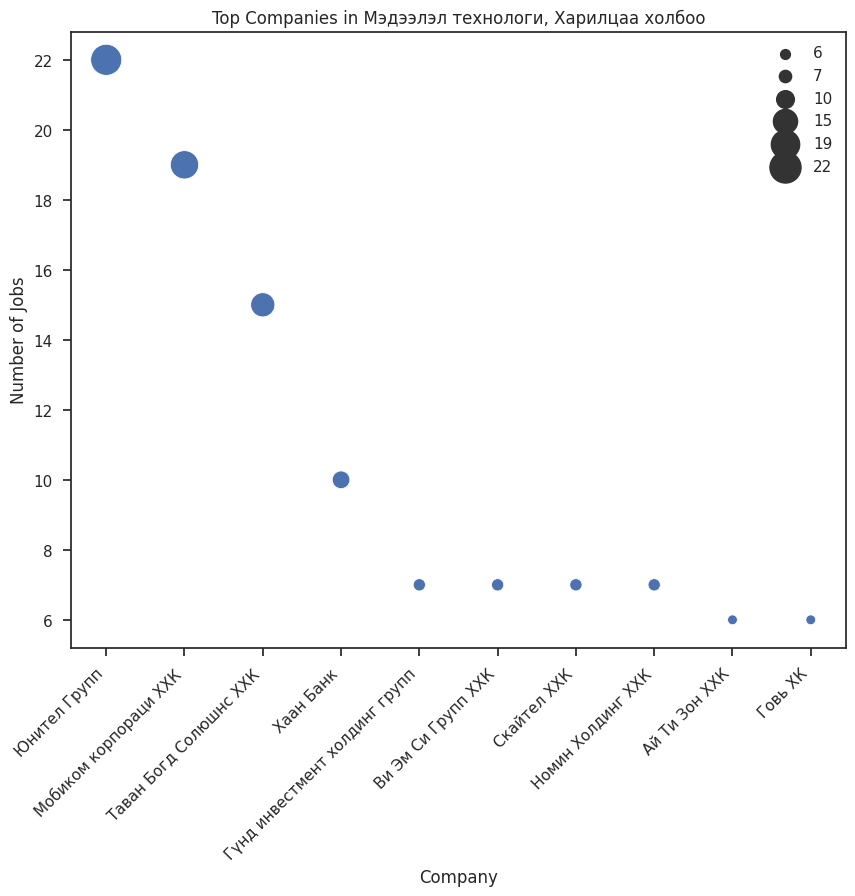

In [ ]:
df_filtered = df[df['Салбар'] == 'Мэдээлэл технологи, Харилцаа холбоо']

#top companies
top_companies = df_filtered['Компани'].value_counts().head(10)

#scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=top_companies.index, y=top_companies.values, size=top_companies.values, sizes=(50, 500))
plt.title('Top Companies in Мэдээлэл технологи, Харилцаа холбоо')
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.show()

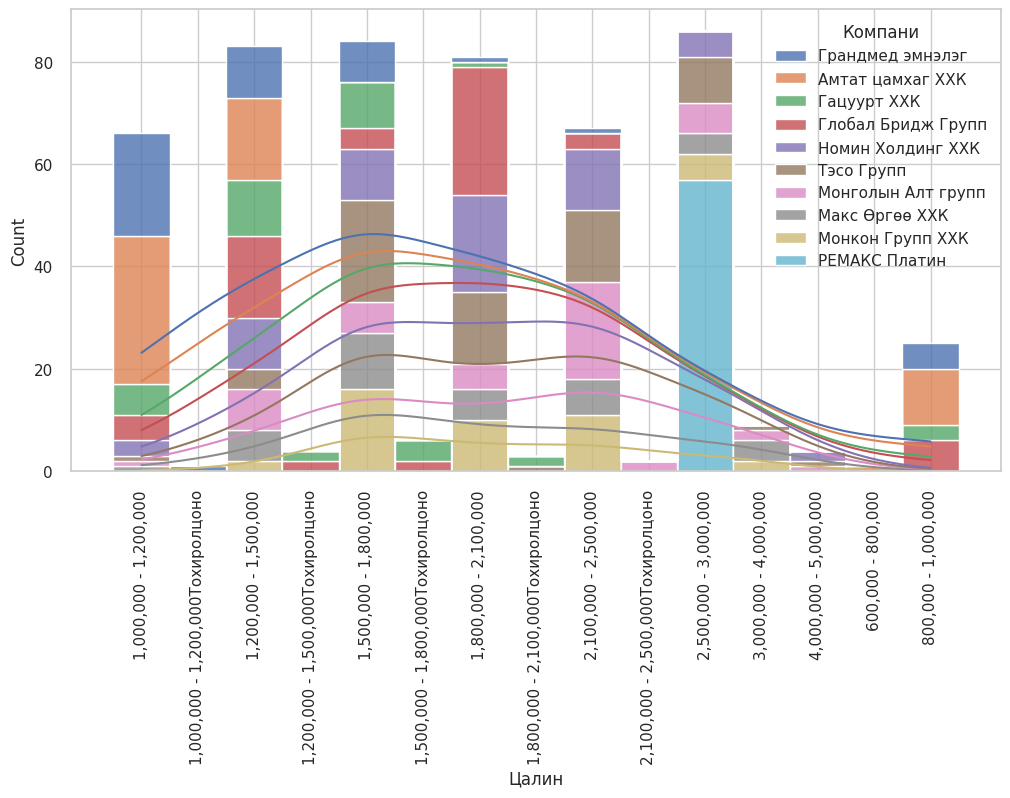

In [ ]:
top_companies = df['Компани'].value_counts().nlargest(10).index.tolist()

# filter top 10 companies
df_top10 = df[df['Компани'].isin(top_companies)]

df_top10_sorted = df_top10.sort_values(by='Цалин')
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
sns.histplot(data=df_top10_sorted, x='Цалин', hue='Компани', multiple='stack', bins=20, kde=True, element='step', alpha=0.8)
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '1,000,000 - 1,200,000'),
  Text(1, 0, '1,000,000 - 1,200,000Тохиролцоно'),
  Text(2, 0, '1,200,000 - 1,500,000'),
  Text(3, 0, '1,200,000 - 1,500,000Тохиролцоно'),
  Text(4, 0, '1,500,000 - 1,800,000'),
  Text(5, 0, '1,500,000 - 1,800,000Тохиролцоно'),
  Text(6, 0, '1,800,000 - 2,100,000'),
  Text(7, 0, '1,800,000 - 2,100,000Тохиролцоно'),
  Text(8, 0, '2,100,000 - 2,500,000'),
  Text(9, 0, '2,100,000 - 2,500,000Тохиролцоно'),
  Text(10, 0, '2,500,000 - 3,000,000'),
  Text(11, 0, '2,500,000 - 3,000,000Тохиролцоно'),
  Text(12, 0, '3,000,000 - 4,000,000'),
  Text(13, 0, '3,000,000 - 4,000,000Тохиролцоно'),
  Text(14, 0, '320,000 - 400,000'),
  Text(15, 0, '320,000 - 400,000Тохиролцоно'),
  Text(16, 0, '4,000,000 - 5,000,000'),
  Text(17, 0, '4,000,000 - 5,000,000Тохиролцоно'),
  Text(18, 0, '400,000 - 600,000'),
  Text(19,

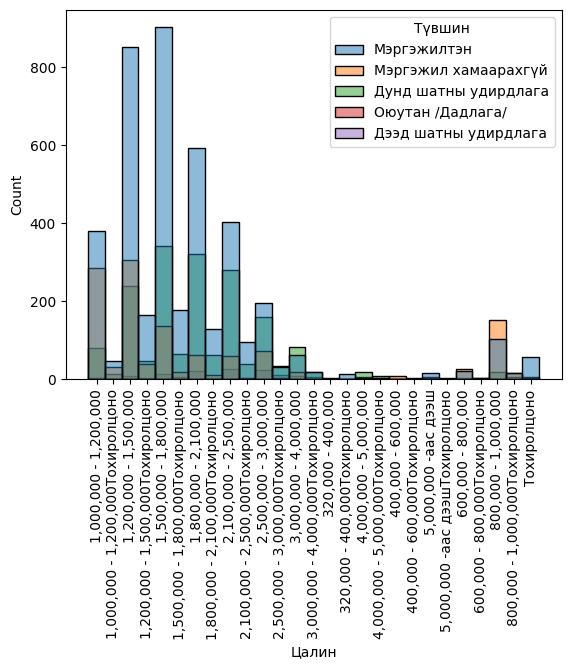

In [ ]:
df_sorted = df.sort_values(by='Цалин', ascending=True) 

ax = sns.histplot( x="Цалин", hue="Түвшин", data=df_sorted)
plt.xticks(rotation=90)